In [15]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorboard as tb
import tensorflow as tf
from tensorflow.python.summary.summary_iterator import summary_iterator

plt.style.use('ggplot')

In [10]:
def read_event_file(path):
    info = []
    for event in summary_iterator(path):
        step = event.step
        for summary_value in event.summary.value:
            tag = summary_value.tag
            val = summary_value.simple_value
            info.append([step, tag, val])
    df = pd.DataFrame(info, columns=['step', 'tag', 'value'])
    dfp = df.pivot_table(values='value', index='step', columns='tag')
    return dfp

In [67]:
runs_path = './../../runs_saved/'
event_path = 'Jun09_13-54-45_rename_dvae_mnistmd_v256_ds2_remote.yaml/events.out.tfevents.1623236085.rename.218148.0'
path = os.path.join(runs_path, event_path)

df = read_event_file(path)

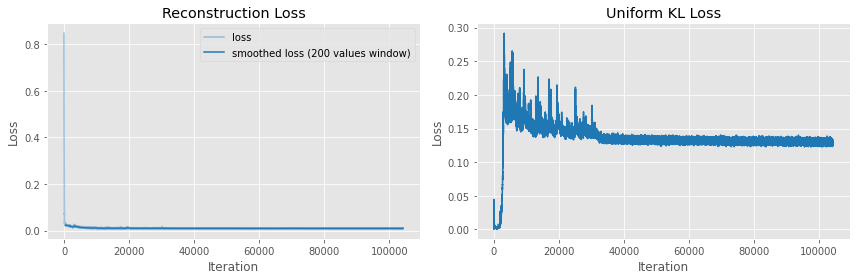

In [80]:
recon_loss = df['loss/recon_loss'].values.copy()
# recon_loss[:200] = np.nan

recon_loss_smooth = df['loss/recon_loss'].rolling(window=200).mean().values.copy()
recon_loss_smooth[:500] = np.nan

kl_loss = dfp['loss/kld_codes_loss'].values.copy()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

axes[0].title.set_text("Reconstruction Loss")
axes[0].set_xlabel("Iteration")
axes[0].set_ylabel("Loss")
axes[0].plot(recon_loss, c='tab:blue', alpha=0.4, label='loss')
axes[0].plot(recon_loss_smooth, c='tab:blue', label='smoothed loss (200 values window)')
axes[0].legend()

axes[1].title.set_text("Uniform KL Loss")
axes[1].set_xlabel("Iteration")
axes[1].set_ylabel("Loss")
axes[1].plot(kl_loss, c='tab:blue')

plt.tight_layout()
plt.show()